In [1]:
import random

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [41]:
df = pd.read_csv("archive/sign_mnist_train.csv")
X, y = df.iloc[:, 1:].values, df.iloc[:, 0].values

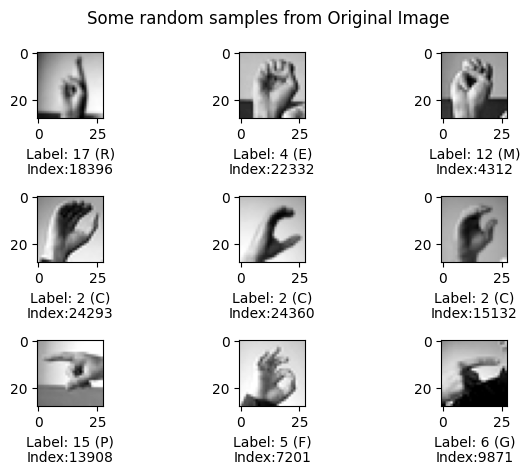

In [42]:
from string import ascii_uppercase

fig, axes = plt.subplots(3, 3)
for ax in axes.flatten():
    idx = random.randint(0, X.shape[0])
    ax.imshow(np.reshape(X[idx], (-1, 28)), cmap="gray")
    ax.set_xlabel(f"Label: {y[idx]} ({ascii_uppercase[y[idx]]})\nIndex:{idx}")
fig.suptitle("Some random samples from Original Image")
fig.tight_layout()

In [43]:
# Normalize X and reshape
X = np.reshape(X/255, (-1, 28, 28, 1))

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Input

#Model Definition
model = Sequential()
model.add(Input(shape=(28, 28, 1)))
model.add(Conv2D(16, (5, 5), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (5, 5), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000))
model.add(Dense(25))
model.add(Activation("softmax"))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 16)     │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        25,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1000)           │     3,137,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 25)             │        25,025 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 25)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,188,105 (12.16 MB)

 Trainable params: 3,188,105 (12.16 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history = model.fit(X, y, batch_size=64, validation_split=0.01, epochs=100)

Epoch 1/100
425/425 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.6310 - loss: 1.2682 - val_accuracy: 1.0000 - val_loss: 0.0062
Epoch 2/100
425/425 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 1.0000 - loss: 0.0039 - val_accuracy: 0.9964 - val_loss: 0.0076
Epoch 3/100
425/425 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.9929 - loss: 0.0251 - val_accuracy: 1.0000 - val_loss: 3.4136e-04
Epoch 4/100
425/425 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 1.0000 - loss: 2.5483e-04 - val_accuracy: 1.0000 - val_loss: 1.3441e-04
Epoch 5/100
425/425 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 1.0000 - loss: 1.1031e-04 - val_accuracy: 1.0000 - val_loss: 8.9974e-05
Epoch 6/100
425/425 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 1.0000 - loss: 6.7277e-05 - val_accuracy: 1.0000 - val_loss: 6.1800e-05
Epoch 7/100
425/425 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 1.0000 - loss: 4.8976e-05 - val_accuracy: 1.0000 - val_loss: 4.5209e-05
Epoch 8/100
425/425 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/

In [12]:
#Saving the model configuration in json file format
model_json = model.to_json()
with open("Trained_model.json", "w") as json_file:
    json_file.write(model_json)     
    
# saving the trained weights in HDF5 file format
model.save_weights("Learned_weights.weights.h5") 

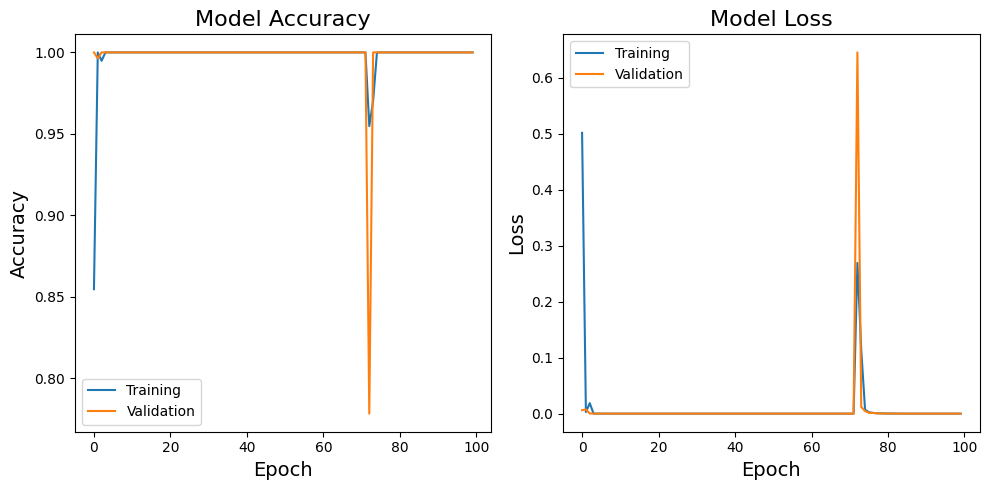

In [44]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_title('Model Accuracy', fontsize=16)
ax1.set_ylabel('Accuracy', fontsize=14)
ax1.set_xlabel('Epoch', fontsize=14)
ax1.legend(['Training', 'Validation'])
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('Model Loss', fontsize=16)
ax2.set_ylabel('Loss', fontsize=14)
ax2.set_xlabel('Epoch', fontsize=14)
ax2.legend(['Training', 'Validation'])
fig.tight_layout()

In [14]:
df_test = pd.read_csv("archive/sign_mnist_train.csv")
X_test, y_test = df_test.iloc[:, 1:].values, df_test.iloc[:, 0].values
X_test = np.reshape(X_test/255, (-1, 28, 28, 1))

In [15]:
test_score, test_accuracy = model.evaluate(X_test, y_test)
test_score, test_accuracy

858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 1.0000 - loss: 1.0923e-06


(1.055511575032142e-06, 1.0)

In [16]:
out=model.predict(X_test).argmax(axis=-1)
out

858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


array([ 3,  6,  2, ..., 18, 17, 23])

<Axes: >

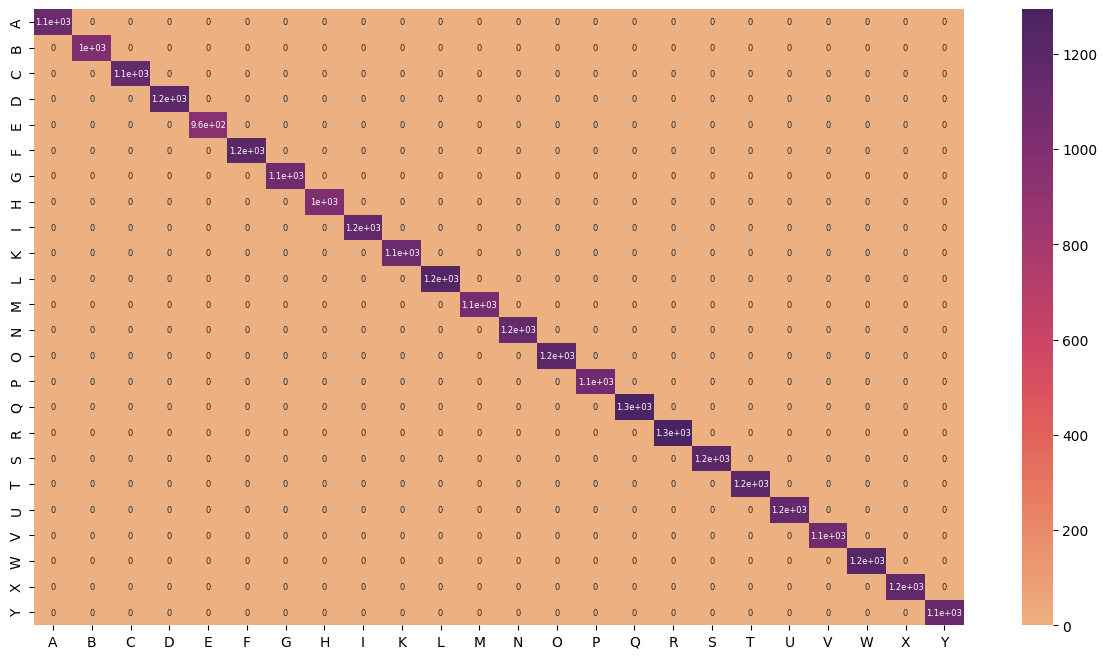

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from string import ascii_uppercase

fig, ax = plt.subplots(figsize=(15, 8))
cm = confusion_matrix(y_test, out)
sns.heatmap(pd.DataFrame(cm, 
             columns=list(ascii_uppercase.replace("Z", "").replace("J", "")), 
             index=list(ascii_uppercase.replace("Z", "").replace("J", ""))
            ), 
            annot=True, annot_kws={"size": 6}, cmap="flare", ax=ax)

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(6,8))
mask = y_test!=out

for i, ax in enumerate(axes.flatten()):
    ax.imshow(np.reshape(X_test[mask][i], (28, 28)), cmap="gray")
    ax.set_xlabel(f"Predicted: {ascii_uppercase[y_test[mask][i]]}, Actual: {ascii_uppercase[out[mask][i]]}")
fig.tight_layout()
fig.suptitle("Some miss classified Samples")

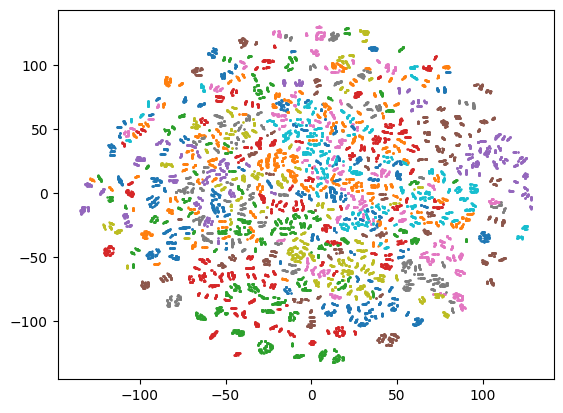

In [46]:
from sklearn.manifold import TSNE
from string import ascii_uppercase

pca=TSNE(n_components=2)
reduced_data = (
    pd.DataFrame(pca
                 .fit_transform(np.reshape(X, (-1, 784))), # Exclude first and last columns (Ensemble_id, and Class)
                 columns=["t-SNE1", "t-SNE2"])
    .assign(Class=[ascii_uppercase[i] for i in y])
)
reduced_data
fig, ax = plt.subplots()

# ax.scatter(reduced_data["PC1"], reduced_data["PC2"])
for idx, (grp, values) in enumerate(reduced_data.groupby("Class")):
    ax.scatter(values["t-SNE1"], values["t-SNE2"], label=grp, s=0.5)

In [47]:
reduced_data

,t-SNE1,t-SNE2,Class
0,13.094292,-37.601810,D
1,82.146057,-41.460697,G
2,-27.292791,-121.033318,C
3,18.258741,-130.027100,C
4,-33.414703,-8.370144,N
...,...,...,...
27450,-83.417114,49.384609,N
27451,-3.707736,-69.544533,X
27452,-74.371826,2.581974,S
27453,8.195581,98.576546,R


In [48]:
from pycaret.classification import *

In [ ]:
exp=setup(data=np.reshape(X, (-1, 784)), target=y)
best_model = compare_models()

,Description,Value
0,Session id,4389
1,Target,target
2,Target type,Multiclass
3,Target mapping,"0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 10: 9, 11: 10, 12: 11, 13: 12, 14: 13, 15: 14, 16: 15, 17: 16, 18: 17, 19: 18, 20: 19, 21: 20, 22: 21, 23: 22, 24: 23"
4,Original data shape,"(27455, 785)"
5,Transformed data shape,"(27455, 785)"
6,Transformed train set shape,"(19218, 785)"
7,Transformed test set shape,"(8237, 785)"
8,Numeric features,784
9,Preprocess,True


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,21:31:19
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Gradient Boosting Classifier


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9995,0.0000,0.9995,0.9995,0.9995,0.9995,0.9995,5.0960
rf,Random Forest Classifier,0.9951,1.0000,0.9951,0.9951,0.9951,0.9948,0.9948,3.5120
knn,K Neighbors Classifier,0.9923,0.9999,0.9923,0.9924,0.9923,0.9920,0.9920,0.8270
ridge,Ridge Classifier,0.9809,0.0000,0.9809,0.9814,0.9809,0.9800,0.9800,0.2950
svm,SVM - Linear Kernel,0.9687,0.0000,0.9687,0.9722,0.9688,0.9673,0.9675,2.9450
qda,Quadratic Discriminant Analysis,0.9684,0.0000,0.9684,0.9709,0.9660,0.9670,0.9672,1.8590
dt,Decision Tree Classifier,0.8595,0.9267,0.8595,0.8609,0.8595,0.8534,0.8534,1.9110
nb,Naive Bayes,0.4535,0.8781,0.4535,0.5043,0.4490,0.4296,0.4325,0.2400
ada,Ada Boost Classifier,0.2829,0.0000,0.2829,0.2890,0.2719,0.2515,0.2531,5.0850


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
exp=setup(data=reduced_data)
best_model = compare_models()

In [19]:
corr=df.iloc[:, 1:].corr()
corr

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
pixel1,1.000000,0.980925,0.963479,0.945856,0.927414,0.903463,0.878273,0.857203,0.830903,0.815549,...,0.247990,0.245928,0.266477,0.281247,0.262816,0.255951,0.244069,0.220163,0.186064,0.171375
pixel2,0.980925,1.000000,0.978006,0.952741,0.946009,0.924298,0.899308,0.880546,0.856741,0.842014,...,0.252370,0.250124,0.267791,0.281535,0.266011,0.259662,0.249105,0.227187,0.194068,0.176169
pixel3,0.963479,0.978006,1.000000,0.978557,0.958317,0.949978,0.932616,0.915696,0.892115,0.878522,...,0.260565,0.254763,0.269901,0.275948,0.257800,0.251580,0.242006,0.216101,0.183085,0.169881
pixel4,0.945856,0.952741,0.978557,1.000000,0.978603,0.962856,0.954735,0.943060,0.919271,0.907313,...,0.255885,0.250386,0.265855,0.272967,0.254942,0.248175,0.239362,0.216395,0.182166,0.166320
pixel5,0.927414,0.946009,0.958317,0.978603,1.000000,0.979641,0.962172,0.957767,0.940650,0.927322,...,0.256846,0.252533,0.267119,0.275373,0.257282,0.249216,0.239817,0.218185,0.186842,0.164855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pixel780,0.255951,0.259662,0.251580,0.248175,0.249216,0.243089,0.238803,0.237061,0.237565,0.231308,...,0.522311,0.622495,0.736375,0.851001,0.951797,1.000000,0.956917,0.905624,0.856725,0.808108
pixel781,0.244069,0.249105,0.242006,0.239362,0.239817,0.233301,0.231006,0.230116,0.228766,0.222895,...,0.487027,0.580802,0.687589,0.799984,0.886480,0.956917,1.000000,0.956005,0.896892,0.852774
pixel782,0.220163,0.227187,0.216101,0.216395,0.218185,0.212846,0.212645,0.212639,0.208012,0.206746,...,0.461850,0.545042,0.649787,0.760061,0.847448,0.905624,0.956005,1.000000,0.958818,0.900761
pixel783,0.186064,0.194068,0.183085,0.182166,0.186842,0.185930,0.183467,0.182646,0.186419,0.181030,...,0.430529,0.511098,0.608408,0.710314,0.796855,0.856725,0.896892,0.958818,1.000000,0.960565
